In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

In [2]:
# Load the dataset...
df1 = pd.read_csv("Athletes.csv")
df1.head()

,Bib,Zip,Age,Age Group,Gender,First Half,Second Half,Finish,Positive Split,Percent Change
0,25,93730,30,Under 35,M,3832,3961,7793,129,0.033664
1,9,97124,32,Under 35,M,3845,4059,7904,214,0.055657
2,20,80922,40,40-44,M,3795,4157,7952,362,0.095389
3,46,2136,38,35-39,M,3997,4065,8062,68,0.017013
4,51,6119,26,Under 35,M,3979,4198,8177,219,0.055039


In [3]:
df1.shape

(17220, 10)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17220 entries, 0 to 17219
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bib             17220 non-null  int64  
 1   Zip             17220 non-null  int64  
 2   Age             17220 non-null  int64  
 3   Age Group       17220 non-null  object 
 4   Gender          17220 non-null  object 
 5   First Half      17220 non-null  int64  
 6   Second Half     17220 non-null  int64  
 7   Finish          17220 non-null  int64  
 8   Positive Split  17220 non-null  int64  
 9   Percent Change  17220 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 1.3+ MB


# Now we will drop columns whose will not contribute to our model i.e. Bib , Zip , Age Group , Percent Change ...
# Again Finish Time is  optional beacuse it derives from first and second half so it might be redudant for predicting age..
# Likewise Postivie Split indicates whether the second half of the marathon was slower than the first half so it may be contribute to the model

In [5]:
df2 = df1.drop(['Bib','Zip','Age Group','Percent Change'],axis='columns')
df2.head()

,Age,Gender,First Half,Second Half,Finish,Positive Split
0,30,M,3832,3961,7793,129
1,32,M,3845,4059,7904,214
2,40,M,3795,4157,7952,362
3,38,M,3997,4065,8062,68
4,26,M,3979,4198,8177,219


In [6]:
df2.Gender = df2.Gender.map({'M' : 0, 'F': 1})
df2.head()

,Age,Gender,First Half,Second Half,Finish,Positive Split
0,30,0,3832,3961,7793,129
1,32,0,3845,4059,7904,214
2,40,0,3795,4157,7952,362
3,38,0,3997,4065,8062,68
4,26,0,3979,4198,8177,219


In [7]:
df2.corr()

,Age,Gender,First Half,Second Half,Finish,Positive Split
Age,1.000000,-0.126719,0.237932,0.234699,0.243159,0.129406
Gender,-0.126719,1.000000,0.294834,0.167899,0.227421,-0.084897
First Half,0.237932,0.294834,1.000000,0.881389,0.958840,0.334352
Second Half,0.234699,0.167899,0.881389,1.000000,0.979245,0.739898
Finish,0.243159,0.227421,0.958840,0.979245,1.000000,0.588195
Positive Split,0.129406,-0.084897,0.334352,0.739898,0.588195,1.000000


In [8]:
# Here we can see gender is also negatively corelated to Age so we can also drop gender column..
# adn positive split also showing less correlation towards age so we can drop that column also..

In [9]:
df2.drop(['Gender','Positive Split'],axis='columns')

,Age,First Half,Second Half,Finish
0,30,3832,3961,7793
1,32,3845,4059,7904
2,40,3795,4157,7952
3,38,3997,4065,8062
4,26,3979,4198,8177
...,...,...,...,...
17215,45,7286,17096,24382
17216,63,10891,13701,24592
17217,66,11957,12829,24786
17218,40,11536,13915,25451


In [10]:
# Now we will check if there is any missing value present in our dataframe
df2.isnull().sum()

Age               0
Gender            0
First Half        0
Second Half       0
Finish            0
Positive Split    0
dtype: int64

# We can see there is no missing value present..

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17220 entries, 0 to 17219
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             17220 non-null  int64
 1   Gender          17220 non-null  int64
 2   First Half      17220 non-null  int64
 3   Second Half     17220 non-null  int64
 4   Finish          17220 non-null  int64
 5   Positive Split  17220 non-null  int64
dtypes: int64(6)
memory usage: 807.3 KB


In [12]:
df2.Age.describe()

count    17220.000000
mean        42.217828
std         12.540766
min         18.000000
25%         32.000000
50%         42.000000
75%         51.000000
max         82.000000
Name: Age, dtype: float64

# Now we will remove the outliers in the dataframe...

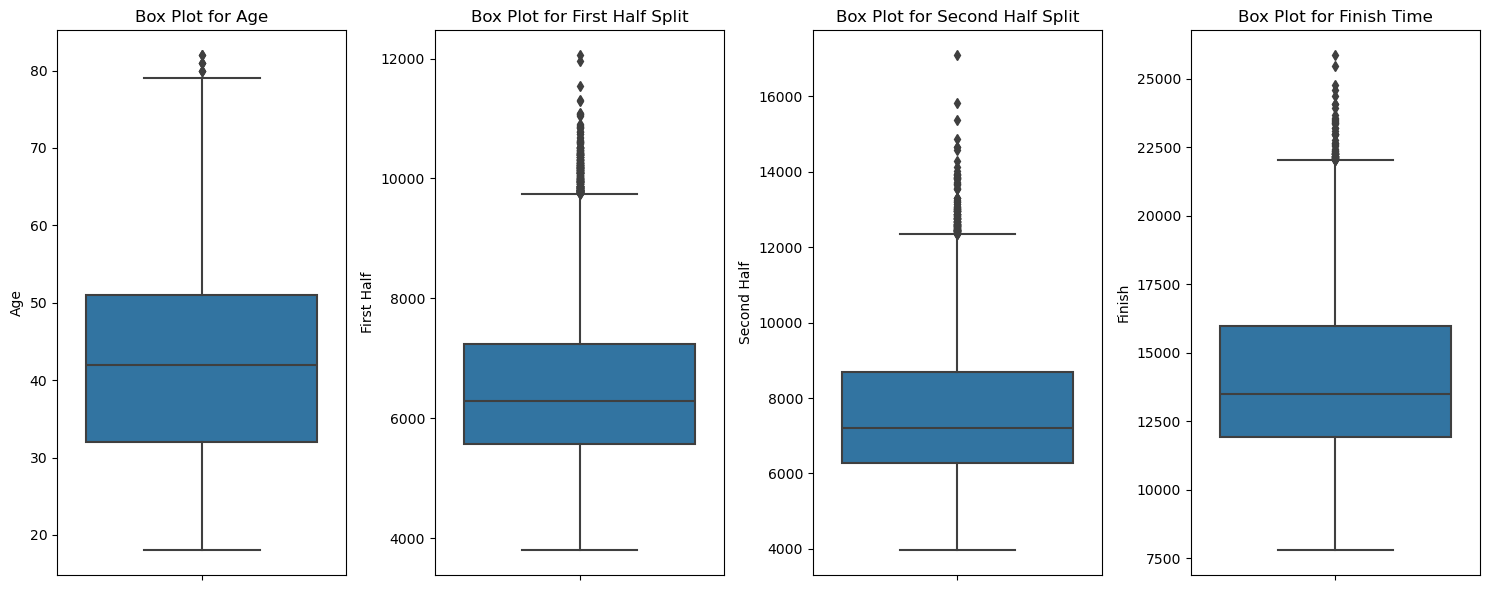

In [13]:
import seaborn as sns
plt.figure(figsize=(15,6))
plt.subplot(1,4,1)
sns.boxplot(y=df2['Age'])
plt.title('Box Plot for Age')

plt.subplot(1, 4, 2)
sns.boxplot(y=df2['First Half'])
plt.title('Box Plot for First Half Split')

plt.subplot(1, 4, 3)
sns.boxplot(y=df2['Second Half'])
plt.title('Box Plot for Second Half Split')

plt.subplot(1, 4, 4)
sns.boxplot(y=df2['Finish'])
plt.title('Box Plot for Finish Time')

plt.tight_layout()
plt.show()

In [14]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df3 = df2.copy()
for column in ['Age', 'First Half', 'Second Half', 'Finish']:
    df3 = remove_outliers_iqr(df3, column)

In [15]:
df3.shape

(16773, 6)

# we can see we remove all the outliers and row size reduced from 17220 to 16773..

In [16]:
df3.head()

,Age,Gender,First Half,Second Half,Finish,Positive Split
0,30,0,3832,3961,7793,129
1,32,0,3845,4059,7904,214
2,40,0,3795,4157,7952,362
3,38,0,3997,4065,8062,68
4,26,0,3979,4198,8177,219


<Figure size 1500x1000 with 0 Axes>

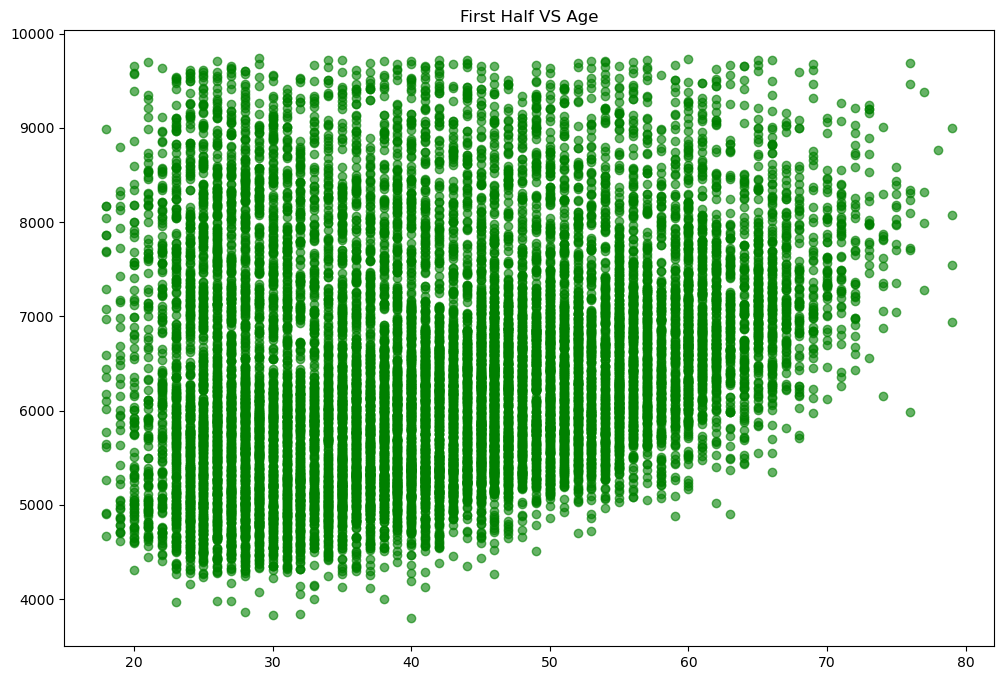

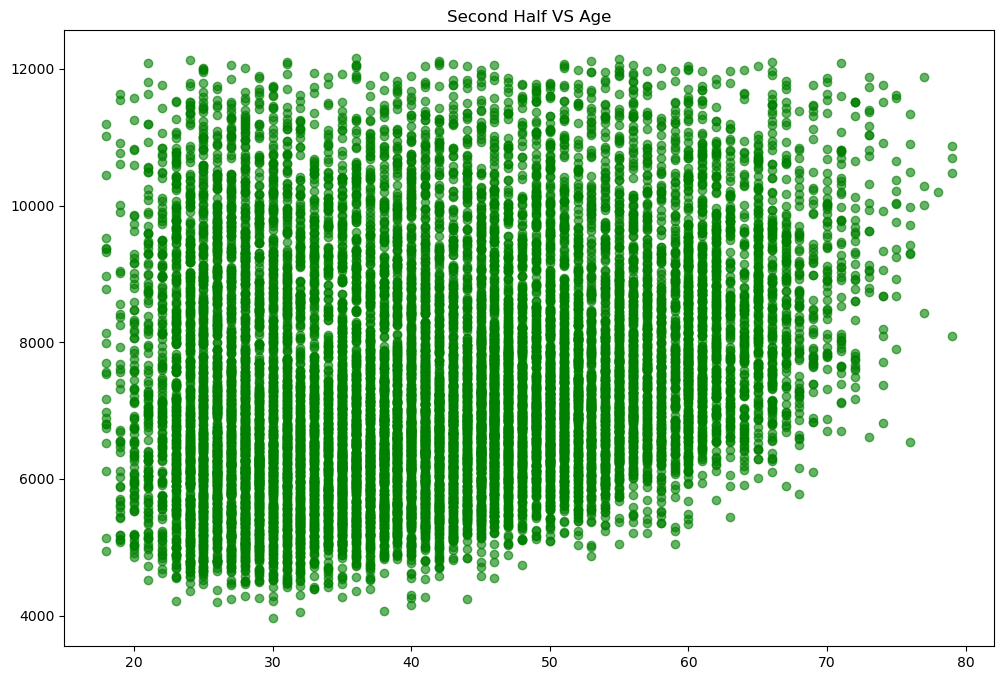

In [17]:
plt.figure(figsize=(15,10))

plt.figure(figsize=(12, 8))
plt.scatter(df3['Age'], df3['First Half'], color='green', label='First Half Split', alpha=0.6)
plt.title('First Half VS Age')
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(df3['Age'], df3['Second Half'], color='green', label='First Half Split', alpha=0.6)
plt.title('Second Half VS Age')
plt.show()

Text(0, 0.5, 'Count')

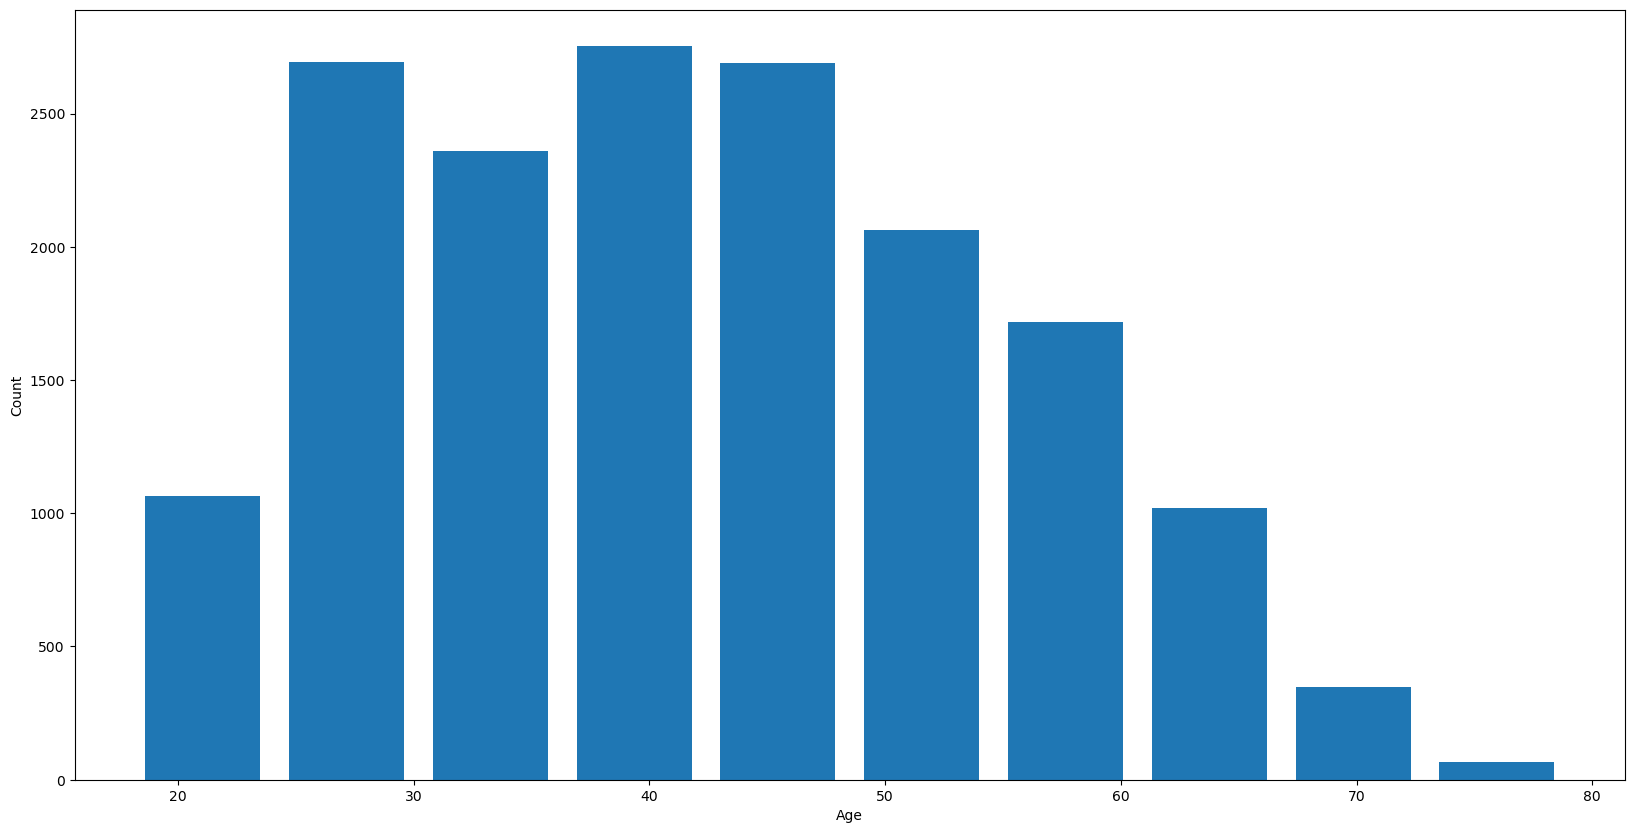

In [18]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df3.Age , rwidth = 0.8)
plt.xlabel("Age")
plt.ylabel("Count")

In [19]:
df4 = df3[~((df3['Age'] >= 10) & (df3['Age'] <= 20) | (df3['Age'] >= 70) & (df3['Age'] <= 80))]

<Figure size 1500x1000 with 0 Axes>

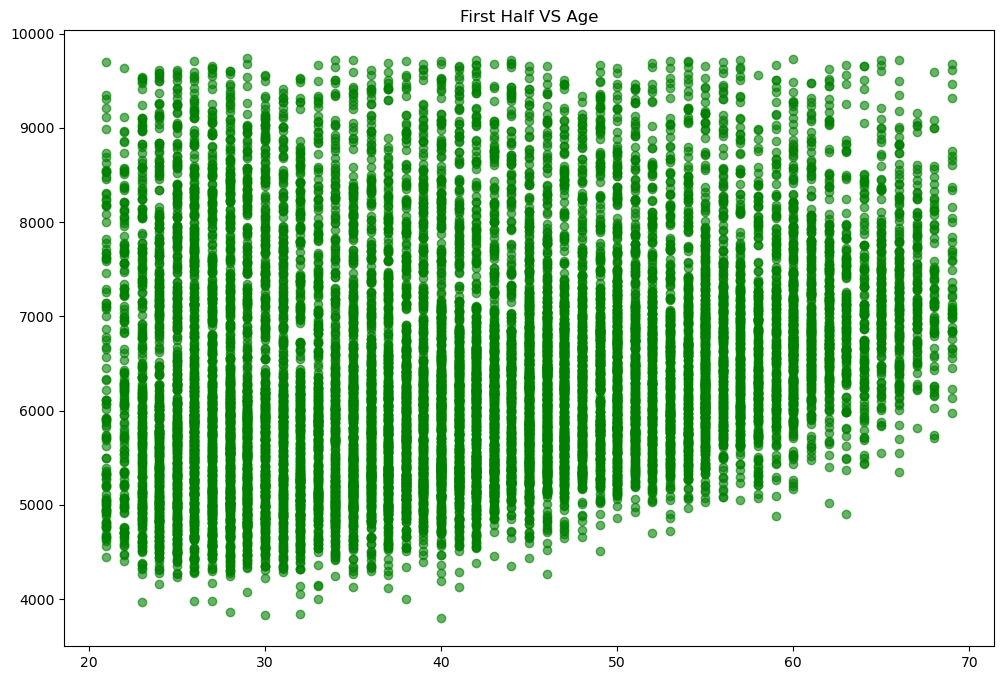

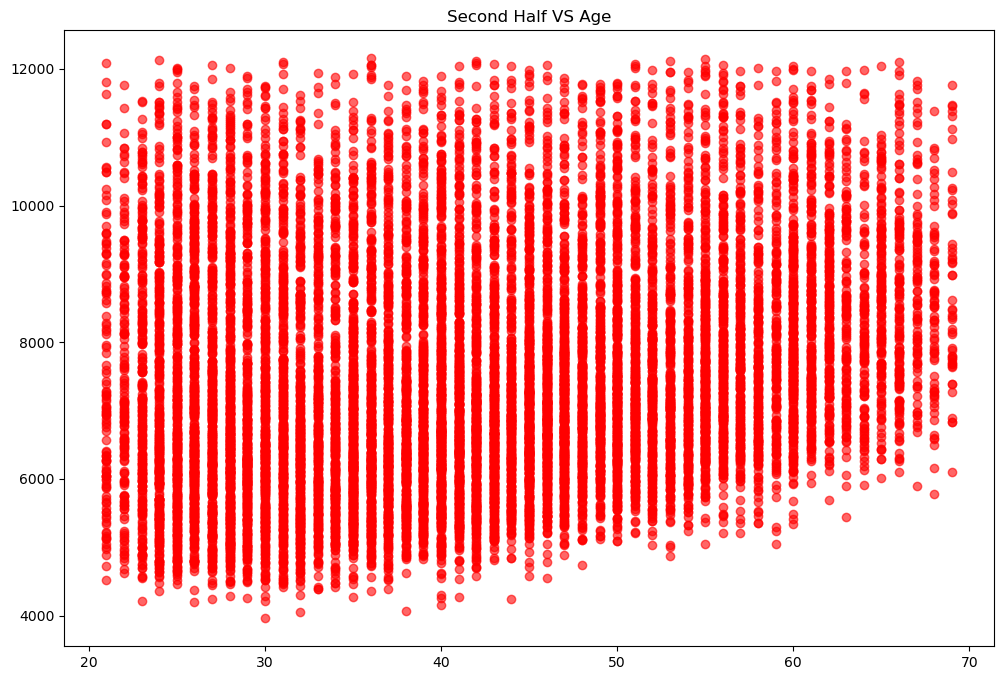

In [20]:
plt.figure(figsize=(15,10))

plt.figure(figsize=(12, 8))
plt.scatter(df4['Age'], df4['First Half'], color='green', label='First Half', alpha=0.6)
plt.title('First Half VS Age')
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(df4['Age'], df4['Second Half'], color='red', label='Second Half', alpha=0.6)
plt.title('Second Half VS Age')
plt.show()

In [21]:
print(df3[['First Half','Second Half','Age']].corr())

             First Half  Second Half       Age
First Half     1.000000     0.886169  0.243661
Second Half    0.886169     1.000000  0.234743
Age            0.243661     0.234743  1.000000


# Now we will split data into two parts i.e. training data set and testing data set...

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = df4[['First Half','Second Half']]
y = df4['Age']


X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=42)



models = {
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Support Vector Regression (SVR)": SVR(kernel='rbf', C=100, epsilon=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    
    print(f"{name}:")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"  R^2 Score: {r2:.2f}")
    
    # Cross-Validation Score
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"  Cross-Validated R^2 Score: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}\n")


Polynomial Regression:
  Mean Absolute Error (MAE): 9.18
  Mean Squared Error (MSE): 123.31
  Root Mean Squared Error (RMSE): 11.10
  R^2 Score: 0.14
  Cross-Validated R^2 Score: 0.03 ± 0.06

Support Vector Regression (SVR):
  Mean Absolute Error (MAE): 9.02
  Mean Squared Error (MSE): 121.24
  Root Mean Squared Error (RMSE): 11.01
  R^2 Score: 0.15
  Cross-Validated R^2 Score: -0.48 ± 0.95

Decision Tree:
  Mean Absolute Error (MAE): 12.25
  Mean Squared Error (MSE): 241.96
  Root Mean Squared Error (RMSE): 15.56
  R^2 Score: -0.69
  Cross-Validated R^2 Score: -1.53 ± 0.40

Random Forest:
  Mean Absolute Error (MAE): 9.55
  Mean Squared Error (MSE): 141.34
  Root Mean Squared Error (RMSE): 11.89
  R^2 Score: 0.01
  Cross-Validated R^2 Score: -0.17 ± 0.11

Gradient Boosting:
  Mean Absolute Error (MAE): 9.07
  Mean Squared Error (MSE): 121.59
  Root Mean Squared Error (RMSE): 11.03
  R^2 Score: 0.15
  Cross-Validated R^2 Score: -0.16 ± 0.32



# here we can see it will be best if we use support vector regression...

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr_model = SVR(kernel='rbf',C=100,epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)
y_train_pred = svr_model.predict(X_train_scaled)
y_test_pred = svr_model.predict(X_test_scaled)

In [24]:
# save the model and the scaler
import joblib
joblib.dump(svr_model, 'svr_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [25]:
svr_model = joblib.load('svr_model.pkl')
scaler = joblib.load('scaler.pkl')
def predict_age(first_half,second_half):
    input_data = np.array([[first_half, second_half]])
    input_data_scaled = scaler.transform(input_data)
    predicted_age = svr_model.predict(input_data_scaled)
    return predicted_age[0]
first_half = int(input("Enter First Half Time: "))
second_half = int(input("Enter Second Half Time: "))

predicted_age = predict_age(first_half, second_half)
print(f"Predicted Age: {predicted_age:.0f} years")
    

Enter First Half Time:  9700
Enter Second Half Time:  13301


Predicted Age: 41 years


C:\Users\santa\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
